In [1]:
# Problem 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np

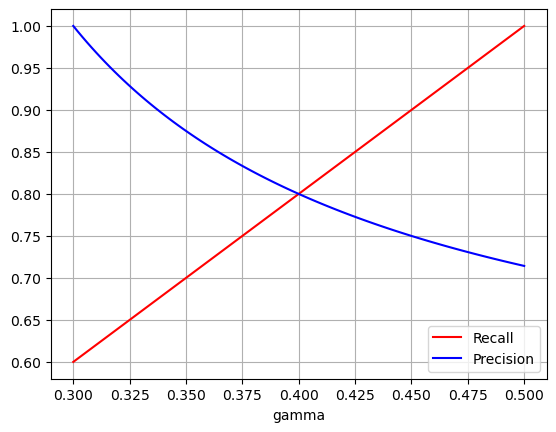

In [3]:
# Express rec and prec as functions of gamma (gamma = TP / N)
rec = lambda gamma: 2 * gamma # Recall = TP / (TP + FN)
prec = lambda gamma: gamma / (2 * gamma - 0.3) # Precision = TP / (TP + FP)
gamma_range = np.linspace(0.3, 0.5, 100)

# Draw rec and prec as functions of gamma
plt.figure()
plt.plot(gamma_range, rec(gamma_range), color = 'red')
plt.plot(gamma_range, prec(gamma_range), color = 'blue')
plt.grid()
plt.legend(['Recall', 'Precision'])
plt.xlabel('gamma')
plt.show()

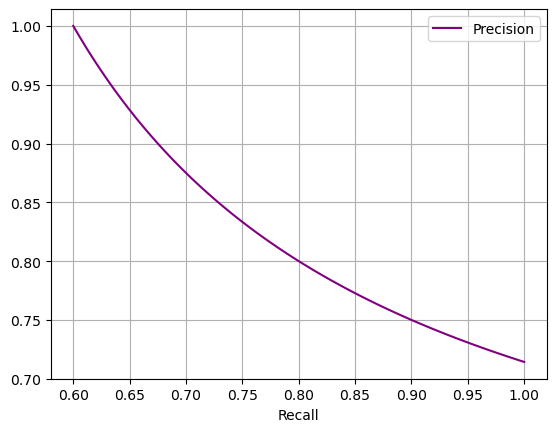

In [4]:
# Express prec as a function of rec and draw its plot
prec_rec = lambda rec: rec / (2 * rec - 0.6)
rec_range = np.linspace(0.6, 1, 100)
plt.figure()
plt.plot(rec_range, prec_rec(rec_range), color = 'purple')
plt.grid()
plt.legend(['Precision'])
plt.xlabel('Recall')
plt.show()

In [5]:
# Problem 2

In [6]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTENC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score

In [7]:
# Load data
data = pd.read_csv('card_transdata.csv')

In [8]:
print(data.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940                1          1   
1                        1.294219                1          0   
2                        0.427715                1          0   
3                        0.362663                1          1   
4                        2.222767                1          1   

   used_pin_number  online_order  fraud  
0                0             0      0  
1                0             0      0  
2                0             1      0  
3                0             1      0  
4                0             1      0  


In [9]:
n_train = 500000
x_all = data.drop('fraud', axis = 1)
y_all = data['fraud']
x_train, y_train = x_all[:n_train], y_all[:n_train]
x_test, y_test = x_all[n_train:], y_all[n_train:]

print('Share of fraudulent transactions = ', np.mean(y_all))
print('Share of fraudulent transactions train = ', np.mean(y_train))
print('Share of fraudulent transactions test = ', np.mean(y_test))

Share of fraudulent transactions =  0.087403
Share of fraudulent transactions train =  0.087334
Share of fraudulent transactions test =  0.087472


In [10]:
min_to_maj_range = [0.1, 0.3, 0.5, 0.7, 0.9, 1]
train_F1 = np.empty((len(min_to_maj_range),))
test_F1 = np.empty((len(min_to_maj_range),))
train_recall = np.empty((len(min_to_maj_range),))
test_recall = np.empty((len(min_to_maj_range),))
train_precision = np.empty((len(min_to_maj_range),))
test_precision = np.empty((len(min_to_maj_range),))

>>>>>>>> min_to_maj = 0.1
resampled data: n_obs = 501966 share of fraud = 0.09090854759087269
Train F1 = 1.0
Test F1 = 0.9998513589224665
>>>>>>>> min_to_maj = 0.3
resampled data: n_obs = 593232 share of fraud = 0.2307680637592038
Train F1 = 1.0
Test F1 = 0.9996227666068429
>>>>>>>> min_to_maj = 0.5
resampled data: n_obs = 684499 share of fraud = 0.33333284635916194
Train F1 = 1.0
Test F1 = 0.9995085096412121
>>>>>>>> min_to_maj = 0.7
resampled data: n_obs = 775766 share of fraud = 0.41176463005597047
Train F1 = 1.0
Test F1 = 0.9994628264472255
>>>>>>>> min_to_maj = 0.9
resampled data: n_obs = 867032 share of fraud = 0.4736837856042222
Train F1 = 1.0
Test F1 = 0.99937145012171
>>>>>>>> min_to_maj = 1
resampled data: n_obs = 912666 share of fraud = 0.5
Train F1 = 1.0
Test F1 = 0.9991773496949339


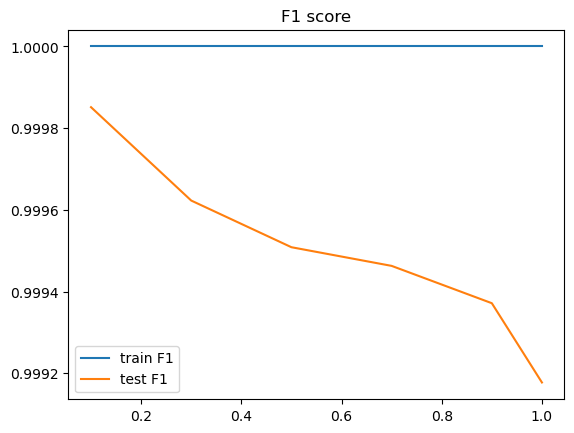

In [14]:
# Oversample the training set
for i in range(len(min_to_maj_range)):
    sm = SMOTENC(categorical_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order'],
                 random_state = 0, k_neighbors = 5,
                 sampling_strategy = min_to_maj_range[i])
    x_res, y_res = sm.fit_resample(x_train, y_train)
    print('>>>>>>>> min_to_maj =', min_to_maj_range[i])
    print('resampled data: n_obs =', y_res.shape[0], 'share of fraud =', np.mean(y_res))

# Fit decision tree for each oversampled datasets
    clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    clf.fit(x_res, y_res)
    train_F1[i] = f1_score(y_res, clf.predict(x_res))
    print('Train F1 =', train_F1[i])
    test_F1[i] = f1_score(y_test, clf.predict(x_test))
    print('Test F1 =', test_F1[i])
    train_precision[i] = precision_score(y_res, clf.predict(x_res))
    train_precision[i] = precision_score(y_test, clf.predict(x_test))
    train_recall[i] = recall_score(y_res, clf.predict(x_res))
    train_recall[i] = recall_score(y_test, clf.predict(x_test))

plt.figure()
plt.plot(min_to_maj_range, train_F1)
plt.plot(min_to_maj_range, test_F1)
plt.title('F1 score')
plt.legend(['train F1', 'test F1'])
plt.show()